In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df1 = pd.read_csv('german_credit_data.csv')
df1.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df1 = df1.iloc[:,1:]

In [ ]:
df1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df1.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df1.columns = ['Age','Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account', 'Credict_amount', 'Duration', 'Purpose', 'Risk']

In [ ]:
df1.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credict_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credict_amount    1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
#Takig care of NaN values by pandas
df1 = df1.fillna(df1.mode().iloc[0])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   1000 non-null   object
 5   Checking_account  1000 non-null   object
 6   Credict_amount    1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df1.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credict_amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1].values
X.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credict_amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [ ]:
#label encdoing
from sklearn.preprocessing import LabelEncoder
L3 = LabelEncoder()

In [ ]:
y = L3.fit_transform(y)
to_encode = ["Housing","Sex", "Purpose", "Saving_accounts", "Checking_account"]

encoders={}
encoders["Job"] = LabelEncoder().fit(["0 - unskilled and non-resident", "1 - unskilled and resident", "2 - skilled", "3 - highly skilled"])
def encode(df,col_name):
    encoder = LabelEncoder().fit(df[col_name])
    encoded_data = encoder.transform(df[col_name])
    return encoder, encoded_data

for col in to_encode:
    a,b = encode(df1,col)
    X[col] = b
    encoders[col]=a

X.head()
#le_sex.classes_
#print(encoders[2].classes_)
#print(list(le_sex.classes_))

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credict_amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [ ]:
X = X.iloc[:,:].values
X

array([[  67,    1,    2, ..., 1169,    6,    5],
       [  22,    0,    2, ..., 5951,   48,    5],
       [  49,    1,    1, ..., 2096,   12,    3],
       ...,
       [  38,    1,    2, ...,  804,   12,    5],
       [  23,    1,    2, ..., 1845,   45,    5],
       [  27,    1,    2, ..., 4576,   45,    1]])

In [ ]:
#train, test split
from sklearn.model_selection import train_test_split
#basic split
X_train_all, X_test, y_train_all, y_test = train_test_split(X,y, test_size = 0.3)
#validation split
X_train, X_validate, y_train, y_validate = train_test_split(X_train_all,y_train_all, test_size = 0.25)

In [ ]:
#metrics
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

def model_metrics_summary(y_test, y_pred):
    #Accuracy
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #R2
    print("R2:", metrics.r2_score(y_test, y_pred))
    #F1
    print("F1:", metrics.f1_score(y_test, y_pred))
    # Recall
    print("Recall:",metrics.recall_score(y_test, y_pred))
    # Precision
    print("Precision:",metrics.precision_score(y_test, y_pred))

    #Confusion Matrix
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');

    # Ticket labels
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    return metrics.f1_score(y_test, y_pred)


Accuracy: 0.7771428571428571
R2: -0.1344747340425534
F1: 0.865979381443299
Recall: 0.984375
Precision: 0.7730061349693251


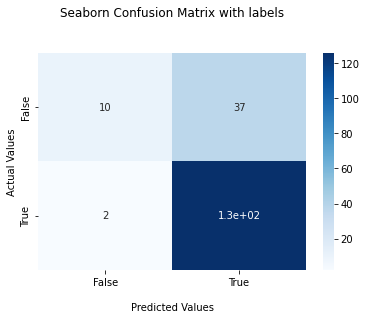

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state =0)
log_clf.fit(X_train,y_train)
y_pred_log = log_clf.predict(X_validate)

f1_lr = model_metrics_summary(y_validate, y_pred_log)

Accuracy: 0.7314285714285714
R2: -0.3671875000000002
F1: 0.8428093645484949
Recall: 0.984375
Precision: 0.7368421052631579


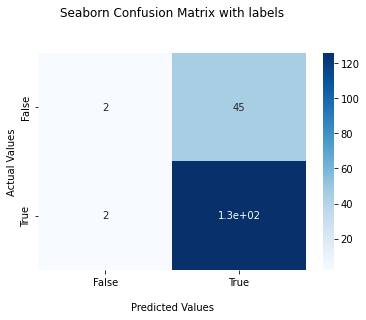

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 23)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_validate)

f1_knn = model_metrics_summary(y_validate, y_pred_knn)

In [ ]:
# #SVM
# from sklearn.svm import SVC
# SVM_clf_1 = SVC(kernel = 'linear')
# SVM_clf_1.fit(X_train, y_train)
# y_pred_svm = SVM_clf_1.predict(X_validate)

# f1_svm = model_metrics_summary(y_validate, y_pred_svm)

Accuracy: 0.7085714285714285
R2: -0.48354388297872375
F1: 0.8145454545454546
Recall: 0.875
Precision: 0.7619047619047619


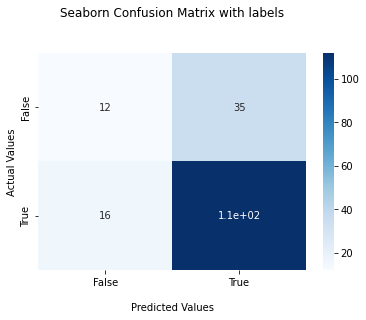

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
Classifier_RF = RandomForestClassifier(n_estimators=140,criterion = 'entropy')
Classifier_RF.fit(X_train, y_train)
y_pred_rf = Classifier_RF.predict(X_validate)
f1_rf = model_metrics_summary(y_validate, y_pred_rf)

Accuracy: 0.6228571428571429
R2: -0.9198803191489366
F1: 0.7317073170731708
Recall: 0.703125
Precision: 0.7627118644067796


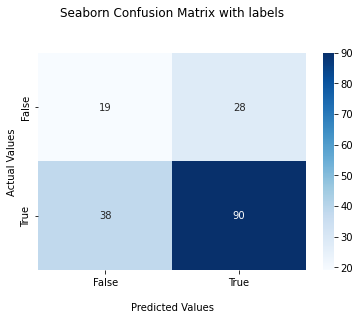

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier_DT = DecisionTreeClassifier(criterion='entropy')
classifier_DT.fit(X_train,y_train)
y_pred_dt = classifier_DT.predict(X_validate)

f1_dt = model_metrics_summary(y_validate, y_pred_dt)

Accuracy: 0.7942857142857143
R2: -0.047207446808510856
F1: 0.8686131386861314
Recall: 0.9296875
Precision: 0.815068493150685


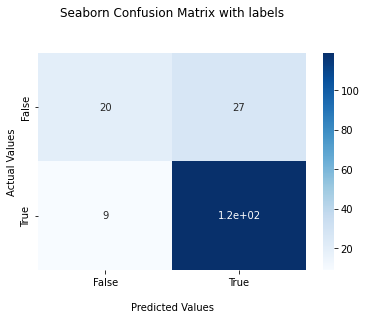

In [ ]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train, y_train)
y_pred_qda = clf_qda.predict(X_validate)

f1_qda = model_metrics_summary(y_validate, y_pred_qda)

Accuracy: 0.7657142857142857
R2: -0.19265292553191515
F1: 0.8487084870848708
Recall: 0.8984375
Precision: 0.8041958041958042


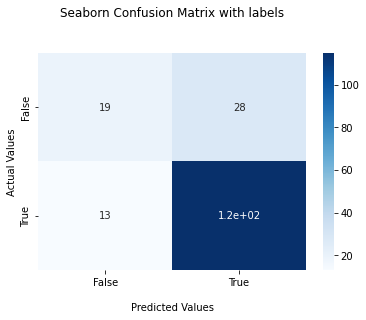

In [ ]:
#Gradient Boosting
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_validate)

f1_gb = model_metrics_summary(y_validate, y_pred_gb)

In [ ]:
#predicted_validate = pd.DataFrame(data=np.array([y_pred_lr,y_pred_knn, y_pred_svm, y_pred_rf, y_pred_dt, y_pred_qda, y_pred_gb]), columns=['Logistic Regression','KNN','SVM','Random Forest','Decision Tree','QDA','Gradient Boosting'])

# Model exports

In [ ]:
import pickle

# classifier_DT
filename = 'classifier_DT.sav'
pickle.dump(classifier_DT, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
#print(result)

In [ ]:
sample = ['22', 'female', '1 - unskilled and resident', 'own', 'little', 'moderate', '2000', '12', 'business']

sample1 = []

def input_encoding(sample, encoders):
    sample[0] = int(sample[0])
    sample[1] = int(encoders["Sex"].transform([sample[1]]))
    sample[2] = int(encoders["Job"].transform([sample[2]]))
    sample[3] = int(encoders["Housing"].transform([sample[3]]))
    sample[4] = int(encoders["Saving_accounts"].transform([sample[4]]))
    sample[5] = int(encoders["Checking_account"].transform([sample[5]]))
    sample[6] = int(sample[6])
    sample[7] = int(sample[7])
    sample[8] = int(encoders["Purpose"].transform([sample[8]]))

    return sample

input_encoding(sample, encoders)

[22, 0, 1, 1, 0, 1, 2000, 12, 0]

In [ ]:
filename = 'encoders.sav'
pickle.dump(encoders, open(filename, 'wb'))
sample

[22, 0, 1, 1, 0, 1, 2000, 12, 0]

In [ ]:
classifier_DT.predict([sample])

array([1])

In [ ]:
df1["Risk"].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ae26215-5d2b-47fa-95ae-2604a34ea4f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>